# Plot making

In [14]:
import numpy as np
import pickle

import matplotlib.pyplot as plt

0.143 +-0.176 max:1.1 median: 0.0926
\scinum{1.0975286704379505} & \scinum{0.14299021402955037} & \scinum{0.09257820874197198}
0.183 +-0.241 max:1.45 median: 0.09
\scinum{1.4545038074634236} & \scinum{0.18311634112276917} & \scinum{0.09003334246760586}
0.119 +-0.14 max:0.955 median: 0.0547
\scinum{0.9546384046329512} & \scinum{0.11935686801291823} & \scinum{0.054727166940183425}
0.0413 +-0.1 max:0.834 median: 0.0159
\scinum{0.8339429435772073} & \scinum{0.04129052618009546} & \scinum{0.01588706426515545}


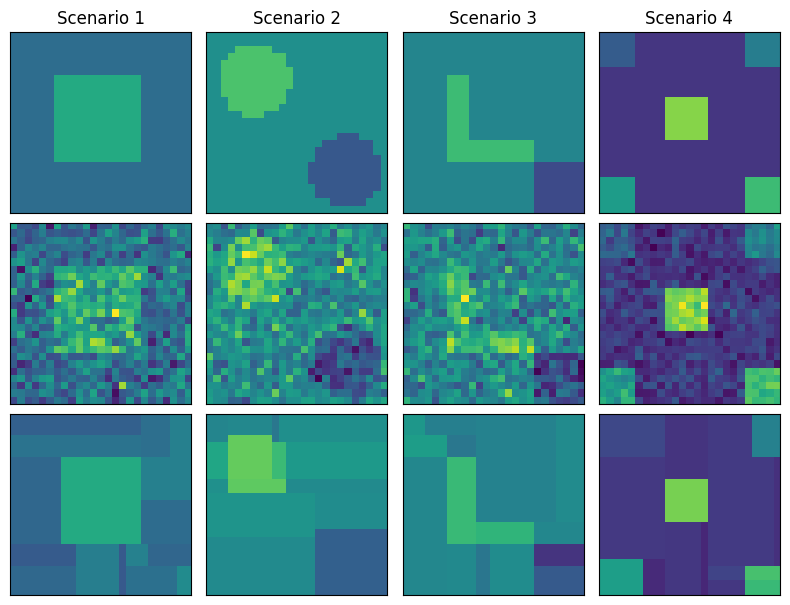

In [15]:
with open("denoising.pickle", "rb") as f:
    gt, y, computed_vals = pickle.load(f)

val_range = gt[0].shape[0]

# fig, axes = plt.subplots(len(gt), 3, figsize=(6,8))
fig, axes = plt.subplots(3, len(gt), figsize=(8,6.2))
axes = axes.T
fig.tight_layout()
for i in range(len(axes)):
    vmin = min(computed_vals[i].min(), y[i].min(), gt[i].min())
    vmax = max(computed_vals[i].max(), y[i].max(), gt[i].max())

    cf = axes[i, 0].imshow(gt[i], vmin=vmin, vmax=vmax)
    # axes[0,0].set_title("Ground Truth")
    axes[i,0].tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

    cf2 = axes[i, 1].imshow(y[i].reshape(val_range, val_range), vmin=vmin, vmax=vmax)
    # axes[0,1].set_title("Noisy data")
    axes[i,1].tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

    cf3 = axes[i, 2].imshow(computed_vals[i], vmin=vmin, vmax=vmax)
    # axes[0,2].set_title("Computed - axis aligned")
    axes[i,2].tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

    rel_diff = np.abs(gt[i] - computed_vals[i]).flatten() / np.abs(gt[i]).max()
    print(f"{rel_diff.mean():.3g} +-{rel_diff.std():.3g} max:{rel_diff.max():.3g} median: {np.median(rel_diff):.3g}")
    print(f"\\scinum{{{rel_diff.max()}}} & \\scinum{{{rel_diff.mean()}}} & \\scinum{{{np.median(rel_diff)}}}")

for i, scenario in enumerate(range(1,5)):
    axes[i,0].set_title(f"Scenario {scenario}")

plt.tight_layout()
plt.savefig("denoising.png", dpi=300)

In [16]:
# partitioning computed separately from NN parameters that are fixed due to manual seed
def NN_points():
     return np.array([[[-2.0, 0.029603082415047756], [-1.2859561953037573, 0.0855114286803164]],
                      [[-1.2859561953037573, 0.0855114286803164], [-1.2198921609892763, 0.5249375745004793]],
                      [[-1.2198921609892763, 0.5249375745004793], [-2.0, 0.7389492163821089]],
                      [[-2.0, 0.7389492163821089], [-1.2198921609892763, 0.5249375745004793]],
                      [[-1.2198921609892763, 0.5249375745004793], [-0.9981289008347859, 2.0]],
                      [[-1.1741232941543835, 2.0], [-2.0, 1.7532795968138017]],
                      [[-1.5994953415246205, -2.0], [-1.2859561953037573, 0.0855114286803164]],
                      [[-2.0, 1.7532795968138017], [-1.1741232941543835, 2.0]],
                      [[-1.2859561953037573, 0.0855114286803164], [0.011563786801306295, 0.1871049107167508]],
                      [[0.011563786801306295, 0.1871049107167508], [-1.2198921609892763, 0.5249375745004793]],
                      [[2.0, 0.0637307212809751], [0.011563786801306295, 0.1871049107167508]],
                     ])

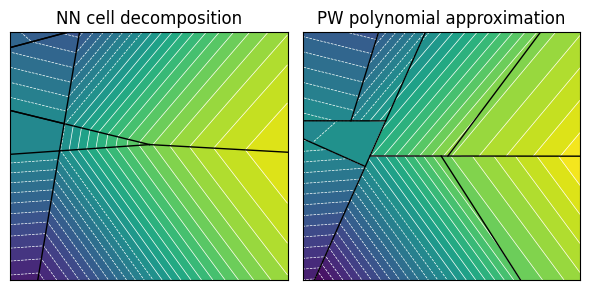

In [17]:
with open("NNfits.pickle", "rb") as f:
    results = pickle.load(f)

res = results["d3,t60,p2"]
computed_vals = res[0]
nn_visualize = res[1]
gt = res[2]
x1 = res[3]
x2 = res[4]
X_train = res[5]
NNspace = res[6]
breaklines = res[7]

vmin = min(computed_vals.min(), nn_visualize.min())
vmax = max(computed_vals.max(), nn_visualize.max())

contours = np.linspace(vmin,vmax,30)
fig, [ax, ax2] = plt.subplots(1, 2, figsize=(6,3))
cf1 = ax.contourf(x1, x2, nn_visualize, contours, vmin=vmin, vmax=vmax)
cf1 = ax.contour(x1, x2, nn_visualize, contours, colors="w", linewidths=0.5)
ax.set_title("NN cell decomposition")
for p1, p2 in NN_points():
    ax.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1)

cf2 = ax2.contourf(x1, x2, computed_vals, contours)
cf2 = ax2.contour(x1, x2, computed_vals, contours, colors="w", linewidths=0.5)
ax2.set_title("PW polynomial approximation")
for p1, p2 in breaklines:
    ax2.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1)


ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax2.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.tight_layout()
plt.savefig("NN_intro.png", dpi=400)

0.0469 +-0.0926 max:0.499 median: 0.0001
\scinum{0.49887991165379475} & \scinum{0.04685379257004139} & \scinum{0.00010017119702482091}
0.01 +-0.0372 max:0.374 median: 6.37e-05
\scinum{0.3742223619441276} & \scinum{0.010007973010744676} & \scinum{6.371677832554213e-05}


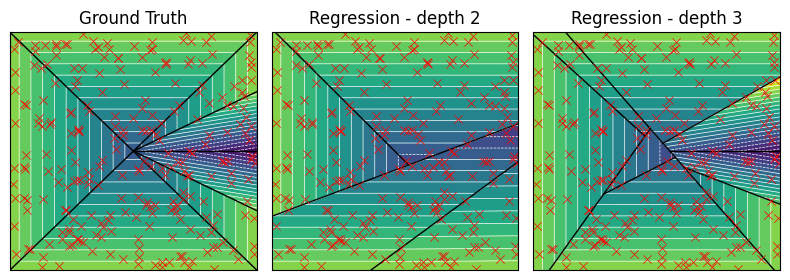

In [18]:
val_range = 100
with open("cones.pickle", "rb") as f:
    results = pickle.load(f)

v1 = "d2,t5,p1"
v2 = "d3,t10,p1"
gt = results[v1][1]
X_train = results[v1][4]
vals1 = results[v1][0]
vals2 = results[v2][0]
x1 = results[v2][2]
x2 = results[v2][3]
breaklines1 = results[v1][5]
breaklines2 = results[v2][5]

vmin = min(vals1.min(), vals2.min(), gt.min())
vmax = max(vals1.max(), vals2.max(), gt.max())

contours = np.linspace(vmin, vmax, 20)

fig, [ax, ax2, ax3] = plt.subplots(1, 3, figsize=(8,2.9))
cf = ax.contourf(x1, x2, gt, contours, vmin=vmin, vmax=vmax, zorder=0)
ax.contour(x1, x2, gt, contours, colors="w", linewidths=0.5, zorder=0.25)
for p1, p2 in [[[-val_range,val_range], [val_range,-val_range]], [[-val_range,-val_range], [val_range,val_range]], [[0,0], [val_range,0]], [[0,0], [val_range,val_range*0.5]], [[0,0], [val_range,-val_range*0.5]]]:
    ax.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1, zorder=0.5)
ax.scatter(X_train[:,0], X_train[:,1], color="red", marker="x", zorder=1, linewidths=0.5)
ax.set_title("Ground Truth")

cf2 = ax2.contourf(x1, x2, vals1, contours, vmin=vmin, vmax=vmax, zorder=0)
ax2.contour(x1, x2, vals1, contours, colors="w", linewidths=0.5, zorder=0.25)
for points in breaklines1:
    if len(points) != 2:
        continue
    p1, p2 = points
    ax2.plot([p1[0]-0.5, p2[0]-0.5],[p1[1], p2[1]], color="black", linewidth=1, zorder=0.5)
ax2.scatter(X_train[:,0], X_train[:,1], color="red", marker="x", zorder=1, linewidths=0.5)
ax2.set_xlim(-val_range,val_range)
ax2.set_title("Regression - depth 2")

cf3 = ax3.contourf(x1, x2, vals2, contours, vmin=vmin, vmax=vmax, zorder=0)
ax3.contour(x1, x2, vals2, contours, colors="w", linewidths=0.5, zorder=0.25)
for points in breaklines2:
    if len(points) < 2:
        continue
    p1, p2 = points[:2]
    ax3.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1, zorder=0.5)
ax3.scatter(X_train[:,0], X_train[:,1], color="red", marker="x", zorder=1, linewidths=0.5)
ax3.set_title("Regression - depth 3")

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax2.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax3.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.tight_layout()
plt.savefig("cone_depths.png", dpi=300)

rel_diff1 = np.abs(gt - vals1).flatten() / np.abs(gt).max()
print(f"{rel_diff1.mean():.3g} +-{rel_diff1.std():.3g} max:{rel_diff1.max():.3g} median: {np.median(rel_diff1):.3g}")
print(f"\\scinum{{{rel_diff1.max()}}} & \\scinum{{{rel_diff1.mean()}}} & \\scinum{{{np.median(rel_diff1)}}}")

rel_diff2 = np.abs(gt - vals2).flatten() / np.abs(gt).max()
print(f"{rel_diff2.mean():.3g} +-{rel_diff2.std():.3g} max:{rel_diff2.max():.3g} median: {np.median(rel_diff2):.3g}")
print(f"\\scinum{{{rel_diff2.max()}}} & \\scinum{{{rel_diff2.mean()}}} & \\scinum{{{np.median(rel_diff2)}}}")

0.0363 +-0.0399 max:0.327 median: 0.0246
\scinum{0.32716195149752386} & \scinum{0.036286603222585916} & \scinum{0.024595572191527453}
0.0129 +-0.0168 max:0.189 median: 0.00926
\scinum{0.1886663085338612} & \scinum{0.012912554084793467} & \scinum{0.009264882675604167}


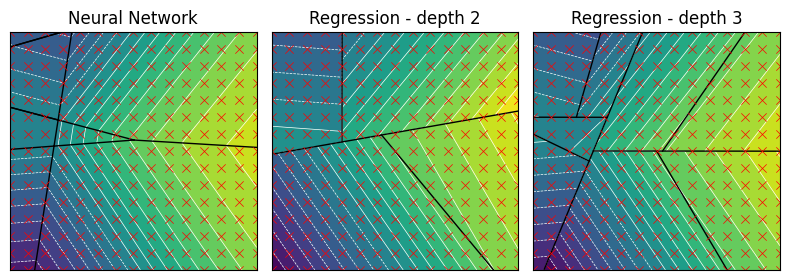

In [19]:
val_range = 2
with open("NNfits.pickle", "rb") as f:
    results = pickle.load(f)

v1 = "d2,t30,p2"
v2 = "d3,t60,p2"
nn_visualize = results[v1][1]
vals1 = results[v1][0]
vals2 = results[v2][0]
x1 = results[v2][3]
x2 = results[v2][4]
breaklines1 = results[v1][7]
breaklines2 = results[v2][7]
X_train = results[v2][6]

gt = results[v2][2]
X_train_true = results[v2][5]

vmin = min(vals1.min(), vals2.min(), nn_visualize.min())
vmax = max(vals1.max(), vals2.max(), nn_visualize.max())

contours = np.linspace(vmin, vmax, 20)

fig, [ax, ax2, ax3] = plt.subplots(1, 3, figsize=(8,2.9))
size = 1

cf = ax.contourf(x1, x2, nn_visualize, contours, vmin=vmin, vmax=vmax, zorder=0)
ax.contour(x1, x2, nn_visualize, contours, colors="w", linewidths=0.5, zorder=0.25)
for p1, p2 in NN_points():
    ax.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1, zorder=0.5)
ax.scatter(X_train[:,0], X_train[:,1], color="red", marker="x", zorder=1, linewidths=0.5)
ax.set_title("Neural Network")

cf2 = ax2.contourf(x1, x2, vals1, contours, vmin=vmin, vmax=vmax, zorder=0)
ax2.contour(x1, x2, vals1, contours, colors="w", linewidths=0.5, zorder=0.25)
for points in breaklines1:
    if len(points) != 2:
        continue
    p1, p2 = points
    ax2.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1, zorder=0.5)
ax2.scatter(X_train[:,0], X_train[:,1], color="red", marker="x", zorder=1, linewidths=0.5)
ax2.set_xlim(-val_range,val_range)
ax2.set_title("Regression - depth 2")

cf3 = ax3.contourf(x1, x2, vals2, contours, vmin=vmin, vmax=vmax, zorder=0)
ax3.contour(x1, x2, vals2, contours, colors="w", linewidths=0.5, zorder=0.25)
for points in breaklines2:
    if len(points) < 2:
        continue
    p1, p2 = points[:2]
    ax3.plot([p1[0], p2[0]],[p1[1], p2[1]], color="black", linewidth=1, zorder=0.5)
ax3.scatter(X_train[:,0], X_train[:,1], color="red", marker="x", zorder=1, linewidths=0.5)
ax3.set_title("Regression - depth 3")

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax2.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax3.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.tight_layout()
plt.savefig("NN_depths.png", dpi=300)

rel_diff1 = np.abs(nn_visualize - vals1).flatten() / np.abs(nn_visualize).max()
print(f"{rel_diff1.mean():.3g} +-{rel_diff1.std():.3g} max:{rel_diff1.max():.3g} median: {np.median(rel_diff1):.3g}")
print(f"\\scinum{{{rel_diff1.max()}}} & \\scinum{{{rel_diff1.mean()}}} & \\scinum{{{np.median(rel_diff1)}}}")

rel_diff2 = np.abs(nn_visualize - vals2).flatten() / np.abs(nn_visualize).max()
print(f"{rel_diff2.mean():.3g} +-{rel_diff2.std():.3g} max:{rel_diff2.max():.3g} median: {np.median(rel_diff2):.3g}")
print(f"\\scinum{{{rel_diff2.max()}}} & \\scinum{{{rel_diff2.mean()}}} & \\scinum{{{np.median(rel_diff2)}}}")

In [20]:
with open("opt_norm.pickle", "rb") as f:
    d = pickle.load(f)
stats = np.array(d[-1][1:]) # 1st value is dropped

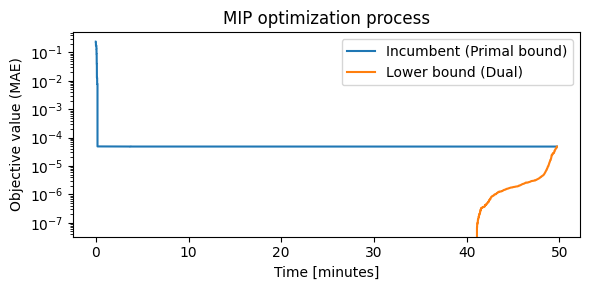

In [21]:
plt.figure(figsize=(6,3))
plt.step(stats[:,0]/60,stats[:,1], where="post", label="Incumbent (Primal bound)")
plt.step(stats[:,0]/60,stats[:,2], where="post", label="Lower bound (Dual)")
plt.yscale("log")
plt.ylabel("Objective value (MAE)")
plt.xlabel("Time [minutes]")
plt.title("MIP optimization process")
plt.legend()

plt.tight_layout()
plt.savefig("mip_process.png", dpi=300)

In [22]:
# time of first almost optimal solution [seconds]
eps = 1e-6
stats[stats[:,1] < stats[-1,1]+eps,0][0]

10.877169609069824

In [23]:
# total time [minutes]
stats[-1,0] / 60

49.7358979066213